# Pembentukan Dataset MNIST Berlabel (5000)

## Import Modules

In [1]:
import os
import copy

import torch

from torchvision import datasets
import torchvision.transforms as T

import numpy as np

## Define Constants

In [2]:
DATA_DIR = "./data"
MODEL_DIR = "./models"

## Load Datasets

In [3]:
training_data = datasets.MNIST(
    root=DATA_DIR, 
    train=True, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.MNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

## Take Only 5000 Labeled Data from Training Data

In [4]:
ns = 500 #number of samples per class
nc = len(training_data.classes)

targets = []
inputs = []
for c in range(nc):
    
    idx_c = (training_data.targets == c)

    targets_c = training_data.targets[idx_c][:ns]
    print(c, len(targets_c))
    targets.append(targets_c)
    
    inputs_c = training_data.data[idx_c][:ns]
    inputs.append(inputs_c)

training_subdata = copy.deepcopy(training_data)

X = torch.vstack(inputs)
y = torch.vstack(targets).flatten()
print("X shape: ", X.shape)
print("y shape: ", y.shape)
training_subdata.data = X
training_subdata.targets = y

0 500
1 500
2 500
3 500
4 500
5 500
6 500
7 500
8 500
9 500
X shape:  torch.Size([5000, 28, 28])
y shape:  torch.Size([5000])


## Dump Created MNIST Subdata

In [5]:
from joblib import dump, load

In [6]:
dump(training_subdata, './data/training_subdata.bin', compress=True)

['./data/training_subdata.bin']

In [7]:
loaded_training_subdata = load('./data/training_subdata.bin')
loaded_training_subdata

Dataset MNIST
    Number of datapoints: 5000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

### test visualize

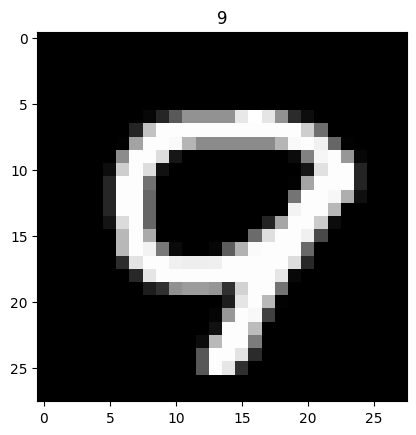

In [11]:
import matplotlib.pyplot as plt

plt.imshow(loaded_training_subdata.data[4999], cmap='gray')
plt.title('%i' % loaded_training_subdata.targets[4999])
plt.show()